    ### NBN VS International

In [1]:
# setup
# https://github.com/teamookla/ookla-open-data/blob/master/tutorials/aggregate_by_county_py.ipynb
# Speedtest Jupyter Notebook - demonstration code
# Pandas cheatsheet - https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
# https://colab.research.google.com/drivespeedtest/.../geopandas.ipynb
%matplotlib inline
# !pip install geopandas
# !pip install shapely
# !pip install rtree
# !apt-get install -y libspatialindex-dev
from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
# from adjustText import adjust_text - this library not loaded

In [36]:
# Load data
#au_tiles = gp.read_file("speedtest-AUS-Q220.geojson")
aus3_tiles = gp.read_file("speedtest-AUS-Q320.geojson")
# load time - less than ten seconds (29,000 lines)
# load time AUS - about 15-20 secs (89,000 lines)
#Process City1

In [37]:
# SHOW Summary of data
# mean, count
len(aus3_tiles)
#bkk_tiles.sum()
#bkk_tiles.describe()

#Process City2

83782

In [38]:
aus3_tiles['avg_d_mbps'] = aus3_tiles['avg_d_kbps'] / 1000
aus3_tiles['avg_u_mbps'] = aus3_tiles['avg_u_kbps'] / 1000

#Process City3

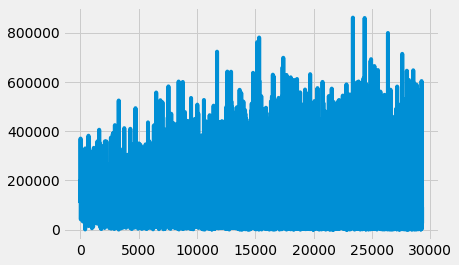

In [51]:
# Show map of data
# plot centroid
bkk_tiles.avg_d_kbps.plot()
#simple plot of b

In [43]:
aus_tiles.head(50)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,avg_d_mbps,avg_u_mbps
0,3112301322111002,38735,19398,7,352,38,"POLYGON ((150.77637 -34.02079, 150.78186 -34.0...",38.735,19.398
1,3112320211131223,38934,11800,22,12,7,"POLYGON ((147.61780 -37.81846, 147.62329 -37.8...",38.934,11.800
2,3130100233020201,54617,18212,25,63,27,"POLYGON ((147.31018 -42.89206, 147.31567 -42.8...",54.617,18.212
3,3112231211312303,32255,2015,61,129,24,"POLYGON ((144.78333 -37.91387, 144.78882 -37.9...",32.255,2.015
4,3112301330200101,47832,23213,10,425,130,"POLYGON ((151.19934 -33.87042, 151.20483 -33.8...",47.832,23.213
5,3112302212220023,27534,2518,40,46,5,"POLYGON ((146.95862 -35.97356, 146.96411 -35.9...",27.534,2.518
6,3112231312213112,2620,4037,627,1,1,"POLYGON ((145.71167 -38.17343, 145.71716 -38.1...",2.620,4.037
7,3103023223323312,36295,17877,6,146,25,"POLYGON ((115.91675 -31.93818, 115.92224 -31.9...",36.295,17.877
8,3112130032010010,25137,12254,11,3,2,"POLYGON ((152.67700 -27.99440, 152.68250 -27.9...",25.137,12.254
9,3112301321103013,40824,12780,12,137,45,"POLYGON ((151.05652 -33.76545, 151.06201 -33.7...",40.824,12.780


In [14]:
bkk_tiles.sort_values("avg_d_kbps").head(25)
# need to resort so indices also resort

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
13865,1322120220101030,72,391,15,1,1,"POLYGON ((101.48071 14.59422, 101.48621 14.594..."
18858,1322033110333300,86,27920,7,1,1,"POLYGON ((100.87646 13.60328, 100.88196 13.603..."
21417,1322033100312230,126,51552,2,4,1,"POLYGON ((100.11841 13.67801, 100.12390 13.678..."
28399,1322122000033221,155,39380,49,1,1,"POLYGON ((101.38733 13.76340, 101.39282 13.763..."
22815,1322031320102312,177,107920,4,8,1,"POLYGON ((100.05249 14.53573, 100.05798 14.535..."
21608,1322033102033100,201,150,5,1,1,"POLYGON ((99.99756 13.45374, 100.00305 13.4537..."
26712,1322031332331311,205,46044,37,1,1,"POLYGON ((100.89294 13.98738, 100.89844 13.987..."
28109,1322122001003302,210,5376,8,1,1,"POLYGON ((101.66748 13.85408, 101.67297 13.854..."
19951,1322033101230331,215,88215,5,1,1,"POLYGON ((100.32166 13.63531, 100.32715 13.635..."
16579,1322031321323331,255,29641,6,1,1,"POLYGON ((100.45349 14.27503, 100.45898 14.275..."


## Histogram for BKK

In [40]:
from datascience import *
# pip install datascience

In [41]:
# HIDDEN

import matplotlib
matplotlib.use('Agg')
from datascience import Table
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [42]:
# http://data8.org/datascience/tutorial.html#visualizing-data
normal_data = Table().with_columns([
    'data1', np.random.normal(loc = 1, scale = 2, size = 200),
    'data2', np.random.normal(loc = 4, scale = 3, size = 200)])
normal_data
# might need to pad BKK, LAX, since different number of observations and need to match to do comparative histogram.

data1,data2
0.185912,6.33788
0.37729,2.8724
0.449981,1.48087
1.43651,6.71396
-0.669172,6.45044
0.67298,1.94563
0.0170662,6.63817
-0.81283,4.273
0.271945,3.15811
5.62094,5.5494


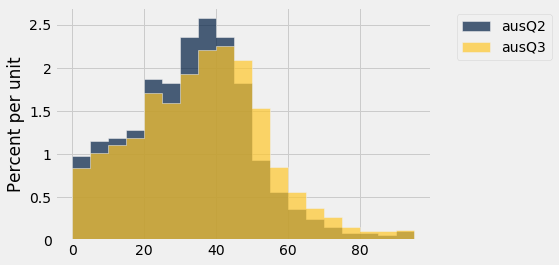

In [65]:
records = 83780

AUS_hist = Table().with_columns([
    'ausQ2', aus_tiles[:records].avg_d_mbps.to_numpy(),
#    'tests', aus_tiles[:records].tests.to_numpy(),
    'ausQ3', aus3_tiles[:records].avg_d_mbps.to_numpy(),
#    'tests3', aus3_tiles[:records].tests.to_numpy()
    # can't weight two bin columns for overlapping Hist - can do one at a time, or unweighted together
])
AUS_hist.hist( bins=np.arange(0,100,5))
# bin_column='aus',
# bins=np.arange(0,200,5) - ie 5Mbps increments
# bins=[0,100,250,500,1000])
# add bins = [array of lower limits eg 0,100,250,500,1000]
# Q2 - 88654 records
# Q3 - 83782 records

In [10]:
dl = aus_tiles.avg_d_mbps.to_numpy()
len(dl)

88654

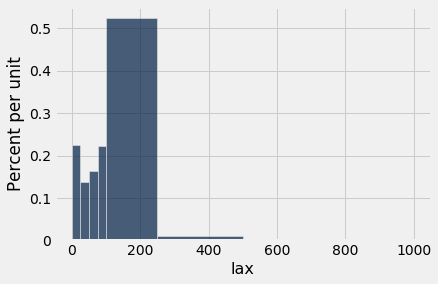

In [69]:
LAX_hist = Table().with_columns([
    'lax', lax_tiles.avg_d_mbps.to_numpy()
])
LAX_hist.hist(bins=[0,25,50,75,100,250,500,1000])
# add bins = [array of lower limits eg 0,100,250,500,1000]
# eg bins=[0,100,250,500,1000]

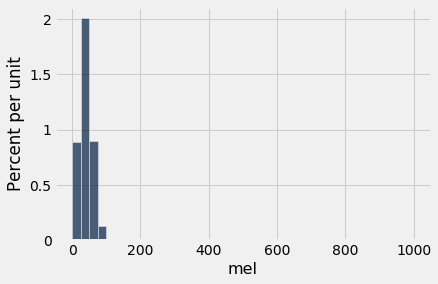

In [68]:
MEL_hist = Table().with_columns([
    'mel', mel_tiles.avg_d_mbps.to_numpy()
])
MEL_hist.hist(bins=[0,25,50,75,100,250,500,1000])
# add bins = [array of lower limits eg 0,100,250,500,1000]
# eg bins=[0,100,250,500,1000]

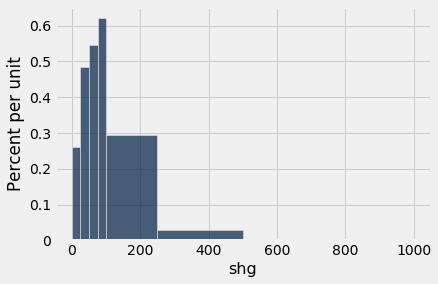

In [67]:
SHG_hist = Table().with_columns([
    'shg', shg_tiles.avg_d_mbps.to_numpy()
])
SHG_hist.hist(bins=[0,25,50,75,100,250,500,1000])
# add bins = [array of lower limits eg 0,100,250,500,1000]
# eg bins=[0,100,250,500,1000]

# Process City 4

### Combine Histograms

In [24]:
records = 15890 # if exceeds count of city records, then will fail as table will be incomplete
# ie max recrods to show all four cities = min(city) = 15892

city_hist = Table().with_columns([
    'mel', mel_tiles[:records].avg_d_mbps.to_numpy(),
    'lax', lax_tiles[:records].avg_d_mbps.to_numpy(),
    'bkk', bkk_tiles[:records].avg_d_mbps.to_numpy(),
    'shg', shg_tiles[:records].avg_d_mbps.to_numpy()
])
city_hist.hist(bins=[0,100, 250, 500])
# error since the arrays are different sizes
# Count of Records
#- LAX 15892
#- MEL 16178
#- BKK 29292
#- SHG 31741

NameError: name 'mel_tiles' is not defined

In [49]:
aus_tiles

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,avg_d_mbps,avg_u_mbps
0,3112301322111002,38735,19398,7,352,38,"POLYGON ((150.77637 -34.02079, 150.78186 -34.0...",38.735,19.398
1,3112320211131223,38934,11800,22,12,7,"POLYGON ((147.61780 -37.81846, 147.62329 -37.8...",38.934,11.800
2,3130100233020201,54617,18212,25,63,27,"POLYGON ((147.31018 -42.89206, 147.31567 -42.8...",54.617,18.212
3,3112231211312303,32255,2015,61,129,24,"POLYGON ((144.78333 -37.91387, 144.78882 -37.9...",32.255,2.015
4,3112301330200101,47832,23213,10,425,130,"POLYGON ((151.19934 -33.87042, 151.20483 -33.8...",47.832,23.213
...,...,...,...,...,...,...,...,...,...
88649,3112112211201320,23706,4675,21,1,1,"POLYGON ((152.99561 -25.98767, 153.00110 -25.9...",23.706,4.675
88650,3112231010302110,25991,8542,14,1,1,"POLYGON ((144.34937 -36.77409, 144.35486 -36.7...",25.991,8.542
88651,3112302000203331,25832,3260,47,1,1,"POLYGON ((146.33240 -34.51561, 146.33789 -34.5...",25.832,3.260
88652,3103112301313131,9412,10959,20,1,1,"POLYGON ((131.47888 -26.00742, 131.48438 -26.0...",9.412,10.959


In [50]:
aus3_tiles

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,avg_d_mbps,avg_u_mbps
0,3112231300310112,45620,17028,10,146,32,"POLYGON ((145.14038 -37.86184, 145.14587 -37.8...",45.620,17.028
1,3112203030022101,28214,9913,17,7,6,"POLYGON ((138.54309 -34.99400, 138.54858 -34.9...",28.214,9.913
2,3112301322203013,8584,1699,120,115,4,"POLYGON ((150.52917 -34.20272, 150.53467 -34.2...",8.584,1.699
3,3112301330200121,66070,35640,11,467,149,"POLYGON ((151.19934 -33.87954, 151.20483 -33.8...",66.070,35.640
4,3112301303332011,44056,17901,11,234,58,"POLYGON ((151.10046 -33.68778, 151.10596 -33.6...",44.056,17.901
...,...,...,...,...,...,...,...,...,...
83777,3112320210031222,14658,1923,171,1,1,"POLYGON ((147.08496 -37.81846, 147.09045 -37.8...",14.658,1.923
83778,3112203010103000,14049,4157,22,1,1,"POLYGON ((138.73535 -34.34344, 138.74084 -34.3...",14.049,4.157
83779,3112132230133301,16250,6340,25,1,1,"POLYGON ((152.91321 -31.48489, 152.91870 -31.4...",16.250,6.340
83780,3112301303110202,22966,4743,724,2,1,"POLYGON ((151.08398 -33.45436, 151.08948 -33.4...",22.966,4.743


In [11]:
print(pd.__version__)


1.2.1


In [23]:
np.arange(0,200,5)

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195])

In [32]:
aus_tiles.tests.to_numpy()

array([352,  12,  63, ...,   1,   1,   1])